# ECG Classification Using Feature Extraction and Classical Machine Learning Approach

### Imports

In [182]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import local Libraries
sys.path.insert(0, '/home/yardenas/ethz/courses_resources/\
                    advanced_machine_learning/ethz-advanced-ml/\
                    projects/project_3/classic_classification/\
                    ecg_features_master')
from ecg_features_master.features.features_submit import *

### Import the Data Set

In [186]:
path_to_data = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
X = pd.read_csv(path_to_data + '/X_train.csv').drop('id', axis=1).to_numpy()
y = pd.read_csv(path_to_data + '/y_train.csv').drop('id', axis=1).to_numpy()
X_end_test = pd.read_csv(path_to_data + '/X_test.csv').drop('id', axis=1).to_numpy()

### A Quick Look on the Data

Class distribution:  Counter({0: 3030, 2: 1474, 1: 443, 3: 170})
Data Dimensions:  (5117, 17813)
Label: N
Label: A
Label: O
Label: ~


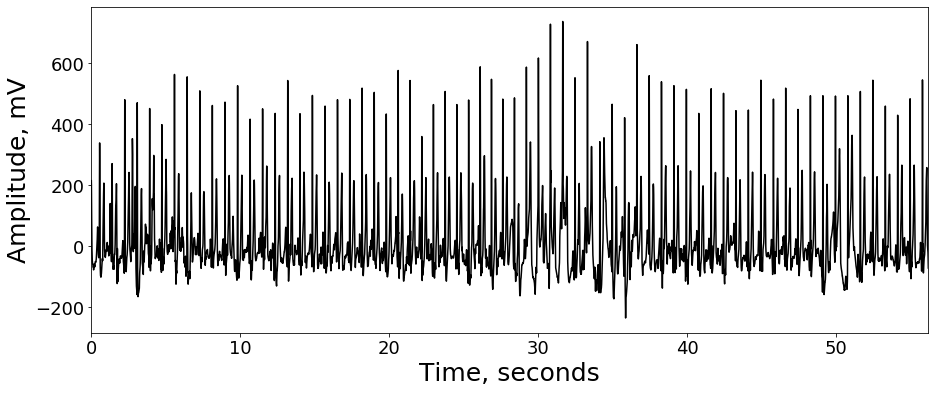

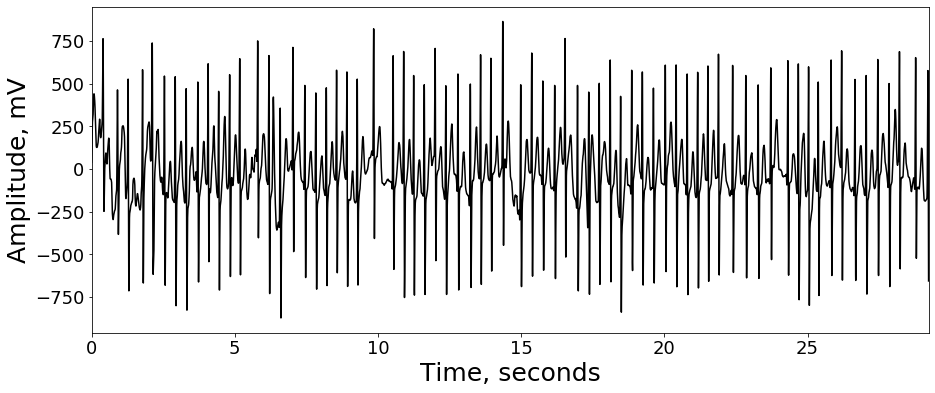

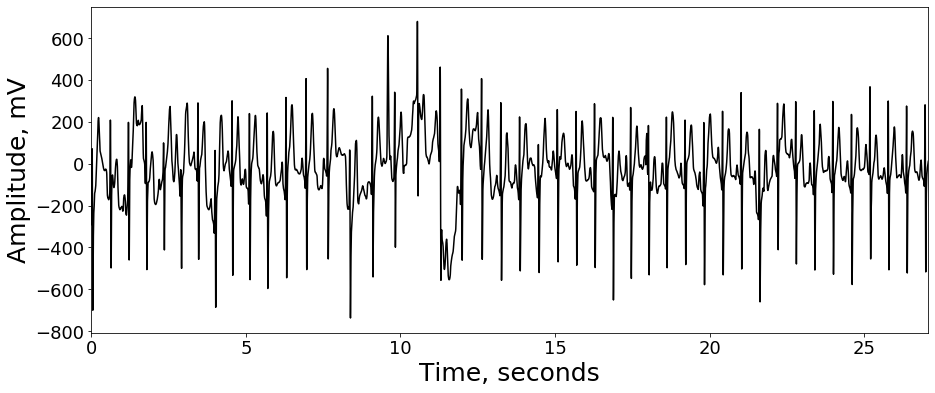

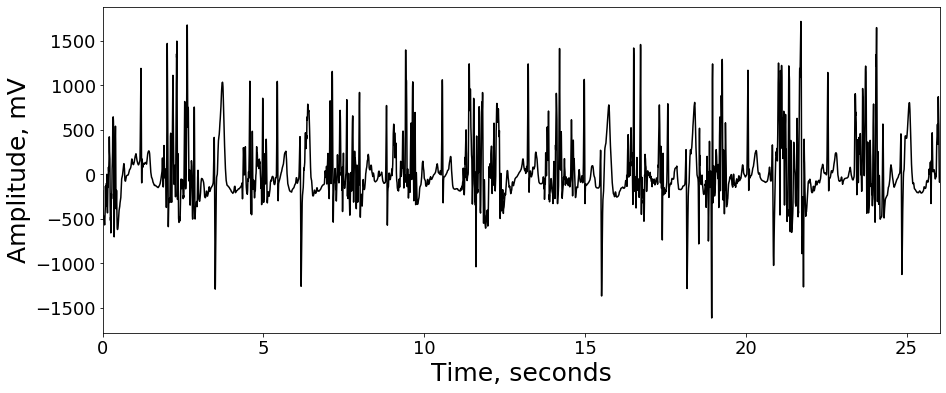

In [189]:
from ecg_features_master.utils.plotting.waveforms import plot_waveform
from collections import Counter
fs = 300 # [Hz]
print('Class distribution: ', Counter(y.ravel()))
print('Data Dimensions: ', X.shape)
labels = {
    'N': 0,
    'A': 1,
    'O': 2,
    '~': 3
}
for (heart, label_id) in labels.items():
    samples = X[np.argwhere(y == label_id)[0, 0], :]
    samples = samples[np.isfinite(samples)]
    print('Label: ' + heart)
    plot_waveform(samples, fs)

### Extract Features

In [190]:
ecg_features = FeaturesSubmit(
                    fs=fs,
                    feature_groups=[
                        'full_waveform_statistics',
                        'heart_rate_variability_statistics',
                        'template_statistics'
                    ]
)
n_features = 315

In [181]:
training = np.empty((X.shape[0], n_features))
for idx, data_point in enumerate(X):
    data_point = data_point[np.isfinite(data_point)]
    ecg_features.calculate_features(
            data_point, 1, 
            filter_bandwidth=[3, 45], show=False,
            normalize=True, polarity_check=True,
            template_before=0.25, template_after=0.4
    )
    training[idx] = ecg_features.get_features().values

NameError: name 'FeaturesSubmit' is not defined

In [191]:
test = np.empty((X_end_test.shape[0], n_features))
for idx, data_point in enumerate(X_end_test):
    data_point = data_point[np.isfinite(data_point)]
    ecg_features.calculate_features(
            data_point, 1, 
            filter_bandwidth=[3, 45], show=False,
            normalize=True, polarity_check=True,
            template_before=0.25, template_after=0.4
    )
    test[idx] = ecg_features.get_features().values

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 162, using nperseg = 162
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(n

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 210, using nperseg = 210
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 217, using nperseg = 217
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 234, using nperseg = 234
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signa

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 99, using

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entrop

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 197, using nperseg = 197
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 107, using nperseg = 107
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in tru

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 238, using nperseg = 238
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 98, using nperseg = 98
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 176, using nperseg = 176
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/heart_rate_variability_statistics.py:446: RuntimeWarning: divide by zero encountered in true_divide
  self.heart_rate = 60. / self.rri
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, usi

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 150, using nperseg = 150
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195,

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 238, using nperseg = 238
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarni

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 220, using nperseg = 220
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in do

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/s

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 235, using nperseg = 235
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 228, using nperseg = 228
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zer

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarni

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signa

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 237, using nperseg = 237
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 235, using nperseg = 235
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 125, using nperseg = 125
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 170, using nperseg = 170
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in do

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero enc

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 155, using nperseg = 155
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/pyeeg.py:526: RuntimeWarning: Mean of empty slice.
  Cmp = numpy.logical_and(Dp <= R, InRange[:-1, :-1]).mean(axis=0)
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/pyeeg.py:534: RuntimeWarning: invalid value encountered in double_scalars
  Ap_En = (Phi_m - Phi_mp) / (N - M)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ya

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similar

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero enc

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / flo

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 236, using nperseg = 236
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 229, using nperseg = 229
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195,

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid valu

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, usin

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 115, using nperseg = 115
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 117, using nperseg = 117
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similar

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 174, using nperseg = 174
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resour

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 141, using nperseg = 141
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 101, using nperseg = 101
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similar

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 235, using nperseg = 235
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signa

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 244, using nperseg = 244
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/heart_rate_variability_statistics.py:446: RuntimeWarning: divide by zero encountered in true_divide
  self.heart_rate = 60. / self.rri
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero en

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 111, using nperseg = 111
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater 

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater 

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 244, using nperseg = 244
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 244, using nperseg = 244
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 150, using nperseg = 150
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg = 156
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater 

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nper

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarni

/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195,

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: Runt

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 232, using nperseg = 232
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 233, using nperseg = 233
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater 

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeW

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 242, using nperseg = 242
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 57, using nperseg = 57
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 177, using nperseg = 177
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:21

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 206, using nperseg = 206
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 236, using nperseg = 236
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/pyeeg.py:526: RuntimeWarning: Mean of empty slice.
  Cmp = numpy.logical_and(Dp <= R, InRange[:-1, :-1]).mean(axis

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 233, using nperseg = 233
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 73, using nperseg = 73
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 244, using nperseg = 244
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 235, using nperseg = 235
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:21

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(np.mean(Lk)))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packa

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 190, using nperseg = 190
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 153, using nperseg = 153
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:364: RuntimeWarning: divide by zero encountered in log
  L.append(n

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 169, using nperseg = 169
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 253, using nperseg = 253
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195,

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 238, using nperseg = 238
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 238, using nperseg = 238
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 76, using nperseg = 76
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/utils/pyrem_univariate.py:362: RuntimeWarning: invalid value encountered in double_scalars
  Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 218, using nperseg = 218
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 232, using nperseg = 232
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 213, using nperseg = 213
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 73, using nperseg = 73
  .format(nperseg, input_length))
/home/yardenas/ethz/courses_resource

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 245, using nperseg = 245
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 2

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 132
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 248, using nperseg = 248
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: Runt

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/pytho

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 231, using nperseg = 231
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/pyeeg.py:526: RuntimeWarning: Mean of empty slice.
  Cmp = numpy.logical_and(Dp <= R, InRange[:-1, :-1]).mean(axis=0)
/home/yardenas/ethz/courses_resources/advanced_machine_learning/ethz-advanced-ml/projects/project_3/classic_classification/ecg_features_master/features/pyeeg.py:534: RuntimeWarning: invalid value encountered in double_scalars
  Ap_En = (Phi_m - Phi_mp) / (N - M)
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:138: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/home/yardenas/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ya

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 255, using nperseg = 255
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.

/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 195, using nperseg = 195
  .format(nperseg, input_length))
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 243, using nperseg = 243
  .format(nperseg, input_length))
/home/yardenas/.local/lib/python3.7/site-packages/pyentrp/entropy.py:139: RuntimeWarning: divide by zero encountered in log
  se = - np.log(similarity_ratio)
/home/yardenas/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:

In [22]:
print('Reliable Data: %0.4f' % (np.count_nonzero(~np.isnan(training)) / np.size(training)))

Reliable Data: 0.9850


### Save the Features' Data

In [194]:
id = [float(i) for i in range(0, len(training))]
feature_id = ['x' + str(i) for i in range(0, n_features)]
df_train = pd.DataFrame(training, id, feature_id)
df_train.index.name = 'id'
df_train.to_csv('training.csv', index=True)
id = [float(i) for i in range(0, len(test))]
df_test = pd.DataFrame(test, id, feature_id)
df_test.index.name = 'id'
df_test.to_csv('test.csv', index=True)

### Load the Features' Data

In [13]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter
path_to_data = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
training = pd.read_csv('training.csv', sep=None).drop('id', axis=1).to_numpy()
y = pd.read_csv(path_to_data + '/y_train.csv').drop('id', axis=1).to_numpy()
test = pd.read_csv('test.csv', sep=None).drop('id', axis=1).to_numpy()

/home/yardenas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  
/home/yardenas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [199]:
print('Class distribution: ', Counter(y.ravel()))
print('Data Dimensions: ', training.shape)
print(np.where(np.isnan(training)))
print(y)

Class distribution:  Counter({0: 3030, 2: 1474, 1: 443, 3: 170})
Data Dimensions:  (5117, 315)
(array([], dtype=int64), array([], dtype=int64))
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [2]]


### Hyper-parameters Tuning and Cross-Validation


In [3]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import (GridSearchCV,
    cross_val_score, StratifiedKFold, KFold)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score

pipeline = make_pipeline(
                         SimpleImputer(strategy='median'),
                         RobustScaler(),
                         GradientBoostingClassifier()
parameter_space = {
    'gradientboostingclassifier__learning_rate': [0.1, 0.025],
    'gradientboostingclassifier__n_estimators': [500],
    'gradientboostingclassifier__subsample': [1., 0.5]
#     'gradientboostingclassifier__max_depth': [3, 5, 7]
}
inner_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)
best_classifier = GridSearchCV(pipeline, parameter_space,
                               n_jobs=-1, scoring='f1_micro',
                               verbose=True, iid=False,
                               cv=inner_cv)
scores = cross_val_score(best_classifier, training, y.ravel(),
                            cv=outer_cv,
                            scoring='f1_micro',
                            n_jobs=1,
                            verbose=True)
print("Cross-validation score is %0.4f, standart deviation is %0.4f" % (scores.mean(), scores.std()))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

### Training the Best Classifier

In [ ]:
best_classifier.fit(training, y.ravel())
print("Best estimators parameters:\n",
      pd.DataFrame(best_classifier.cv_results_))
y_pred = best_classifier.predict(test)
print('Class distribution: ', Counter(y.ravel()))
print('Prediction distribution: ' , Counter(y_pred.ravel()))
id = [float(i) for i in range(0, len(y_pred))]
df = pd.DataFrame({'id': id, 'y': y_pred})
df.to_csv('solution.csv', index=False)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
